# CORTE 2

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import requests
from urllib.request import urlopen

from bs4 import BeautifulSoup
from selenium import webdriver

In [2]:
SITE_URL = 'https://alianzaverde.org.co'

In [3]:
DRIVER_PATH = './geckodriver'

In [4]:
browser = webdriver.Firefox(executable_path = DRIVER_PATH)

C:\Users\Oscar\AppData\Local\Temp\ipykernel_14692\4016513992.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  browser = webdriver.Firefox(executable_path = DRIVER_PATH)


In [5]:
def make_request(browser, relative_path):
    # Making the request and rendering the browser
    browser.get(SITE_URL + relative_path)
    
    # Simulating vertical scrolling for handling lazy load
    check_height = browser.execute_script('return document.body;')
    while True:
        browser.execute_script('window.scrollTo(0, document.body);')
        time.sleep(3)
        height = browser.execute_script('return document.body;')
        if height == check_height: 
            break 
        check_height = height
    
    # Getting HTML content and passing it to BeautifulSoup for scraping analysis
    return BeautifulSoup(browser.page_source, 'html.parser')

In [6]:
soup = make_request(browser, '/lideres-verdes/congreso-2022/senado-2022')

In [7]:
layout = soup.find(class_ = 'main-body')

In [39]:
blocks = layout.find_all(class_ = 'sppb-section', recursive = True)
print(len(blocks))

12


In [46]:
cards = blocks[2].find_all(class_ = 'sppb-row') + blocks[3].find_all(class_ = 'sppb-row') + blocks[4].find_all(class_ = 'sppb-row') + blocks[5].find_all(class_ = 'sppb-row') + blocks[6].find_all(class_ = 'sppb-row') + blocks[7].find_all(class_ = 'sppb-row') + blocks[8].find_all(class_ = 'sppb-row')  + blocks[9].find_all(class_ = 'sppb-row')   + blocks[10].find_all(class_ = 'sppb-row')  + blocks[11].find_all(class_ = 'sppb-row')
len(cards)

10

In [47]:
card = cards[0].find_all(class_ = 'sppb-col-md-3') + cards[1].find_all(class_ = 'sppb-col-md-3') + cards[2].find_all(class_ = 'sppb-col-md-3') + cards[3].find_all(class_ = 'sppb-col-md-3') + cards[4].find_all(class_ = 'sppb-col-md-3') + cards[5].find_all(class_ = 'sppb-col-md-3') + cards[6].find_all(class_ = 'sppb-col-md-3') + cards[7].find_all(class_ = 'sppb-col-md-3') + cards[8].find_all(class_ = 'sppb-col-md-3') + cards[9].find_all(class_ = 'sppb-col-md-3')
len(card)

36

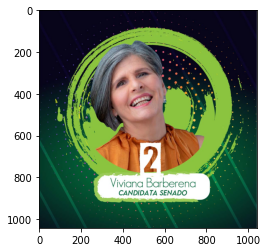

Abogada y filósofa, con un máster en Ciencias de la Administración Pública, en Alemania. Experta en gestión pública, descentralización, transparencia, buen gobierno, modernización del estado, cultura ciudadana y cooperación internacional, temas en los cuales se ha desempeñado alternativamente como servidora pública, consultora y docente.
Red social 1 :  https://twitter.com/VivianaBarbere 
Red social 2 :  https://twitter.com/VivianaBarbere
Red social 3 :  https://www.instagram.com/barberenaviviana/ 


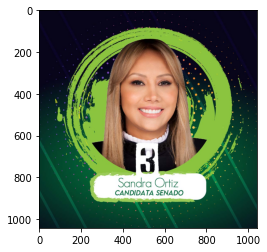

Nacida de seres excepcionales, en tiempos inciertos; es la mujer de retos resueltos. Desde el inicio de su carrera política, su liderazgo se enfoca en mantener la cultura de la equidad, la familia y el fortalecimiento económico, político y social de las regiones en Colombia
Red social 1 :  https://www.facebook.com/sandraortizsenadora
Red social 2 :  https://twitter.com/sandraortizn
Red social 3 :  https://www.youtube.com/channel/UCTwjhE_bLZS72l0RqI_u4OQ/featured
Red social 4 :  https://www.instagram.com/sandraortizn


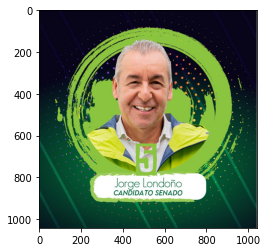

Destacado Senador de la República en el año 2010 fue disciplinado y estricto en el cumplimiento de su función en la producción legislativa y el ejercicio del control político; en particular, participó de forma definitiva en los Proyectos de Ley y de Acto Legislativo trascendentales para el país.
Red social 1 :  https://www.facebook.com/JorgeELondonoU/
Red social 2 :  https://twitter.com/JorgeELondonoU
Red social 3 :  https://youtube.com/user/JorgeLondonoUlloa
Red social 4 :  http://instagram.com/jorgeelondonou


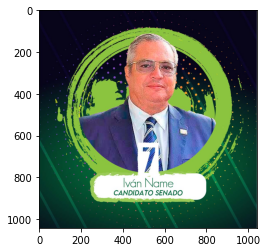

Egresado de la Facultad de Derecho de la Pontificia Universidad Javeriana; fue Diputado a la Asamblea de Cundinamarca, Concejal, Representante a la Cámara por Bogotá y Senador, además de ser fundador del Partido Alianza Verde. Correo de contacto
Red social 1 :  https://www.facebook.com/SenadorIvanName 
Red social 2 :  / https://twitter.com/IvanNameVasquez 
Red social 3 :  https://www.instagram.com/ivannamevasquez/ 


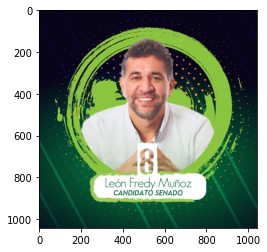

Como congresista pertenece a la Comisión sexta, la comisión de paz y la Comisión de Derechos Humanos. Ha presentado iniciativas para reformar el sistema general de participaciones y la jornada laboral. Ha presentado proyectos de ley que fortalezcan la nutrición saludable, el internet gratuito, el financiamiento a los cuerpos de bomberos, la creación de las provincias, entre otras.
Red social 1 :  https://www.facebook.com/Leonfredym
Red social 2 :  https://twitter.com/LeonFredyM 
Red social 3 :  https://www.instagram.com/leonfredymunozl


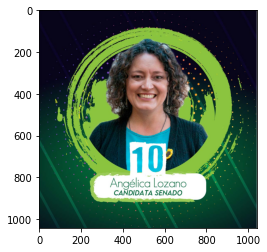

Ciudadana, activista cívica, abogada y Senadora de 2018 a 2022 por el partido Alianza Verde. Representante a la Cámara por Bogotá en 2014 - 2018. Magíster en Gerencia y Práctica del Desarrollo en la Universidad de los Andes y becaria del Instituto Nacional Demócrata (NDI).
Red social 1 :  https://www.facebook.com/angelicalozanocorrea/ 
Red social 2 :  https://twitter.com/AngelicaLozanoC 
Red social 3 :  https://www.youtube.com/user/bogotaserespeta
Red social 4 :  https://www.instagram.com/angelicalozano10/


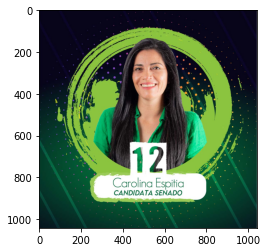

Nacida en Villa de Leyva Boyacá. Desde su infancia se caracterizó por el amor a su familia, solidaridad y capacidad de asumir retos. Ingeniera Industrial de la Universidad Pedagógica y Tecnológica de Colombia, con una Maestría en en pensamiento estratégico y perspectiva de la Universidad Externado de Colombia.
Red social 1 :  / https://www.facebook.com/karolina.jerez 
Red social 2 :  https://twitter.com/CaroEspitiaJ 
Red social 3 :  https://www.instagram.com/caroespitiaj/ 


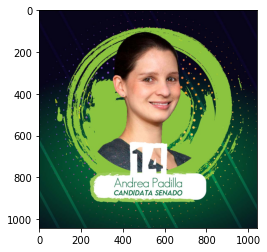

Profesora universitaria. Autora de varias publicaciones sobre derechos animales y justicia juvenil restaurativa (Beca de Investigación del Grupo Coímbra. Programa de Becas para Jóvenes Profesores e Investigadores de Universidades de América Latina, 2009). Columnista ocasional de varios medios de comunicación.
Red social 1 :  https://www.facebook.com/andreanimalidad
Red social 2 :  https://twitter.com/andreanimalidad 
Red social 3 :  https://www.youtube.com/channel/UCnJ85DTEYtqUJ1o9wQLsbyA 
Red social 4 :  https://www.instagram.com/andreanimalidad


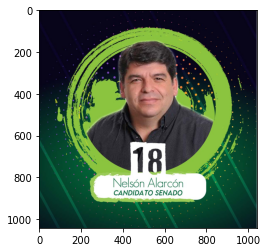

Magíster en Gestión de la Tecnología Educativa. Ex presidente de Sindimaestros en Boyacá. Ex presidente de FECODE y actualmente Ejecutivo (tesorero)Dirigente estudiantil, sindical, social y político desde hace 32 años.
Red social 1 :  https://www.facebook.com/nelson.alarconsuarez.16 
Red social 2 :  https://twitter.com/Nelsonalarcon74 
Red social 3 :  https://www.youtube.com/channel/UC0yGgG_Jj4cUa8kdv_J5n2w 
Red social 4 :  https://www.instagram.com/nelsonalarcon74/ 


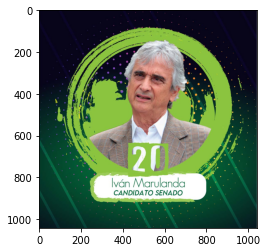

Nació en Pereira en 1946, el cuarto de once hermanos, en la época de la Violencia… cuando liberales y conservadores se mataban. Por eso desde pequeño sabe que lo más importante para el país es que las personas aprendamos a convivir, a dignificar la existencia humana.
Red social 1 :  https://www.facebook.com/IvanMarulandaGomez
Red social 2 :  https://twitter.com/ivanmarulanda
Red social 3 :  https://www.youtube.com/c/IvánMarulandaGomezCo 
Red social 4 :  https://www.instagram.com/ivanmarulandagomez/ 


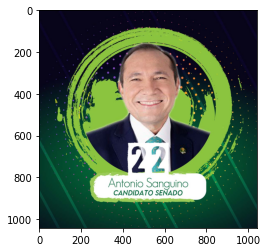

Miembro de la Comisión Segunda del Senado y Co-Presidente de la Comisión de Paz. Sociólogo, Magíster en Desarrollo Regional de la Universidad de Los Andes y Doctor en Gobierno y Administración Pública de la Universidad Complutense de Madrid. Fue Concejal de Bogotá de 2008 a diciembre de 2017.
Red social 1 :  https://www.facebook.com/antonio.sanguino.79 
Red social 2 :  https://twitter.com/AntonioSanguino
Red social 3 :  https://www.youtube.com/channel/UC7yjLuIJdAaJXoIRDSEChHw 
Red social 4 :  https://www.instagram.com/antonio_sanguino 


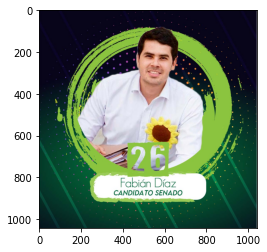

Líder ambiental de Piedecuesta, ha sido visible en el movimiento ambiental del departamento. Trabajó en la Alcaldía de Piedecuesta en la Oficina de Control Interno. Terminó materias de administración de empresas en la Universidad Cooperativa de Colombia, y es perito certificado por la Lonja de Propiedad horizontal, así como tecnólogo del Sena en mercado y venta de bienes inmuebles.
Red social 1 :  https://www.facebook.com/fabiandiazcomunidad/ 
Red social 2 :  https://twitter.com/FabianDiazPlata 
Red social 3 :  https://instagram.com/fabiandiaz.plata 


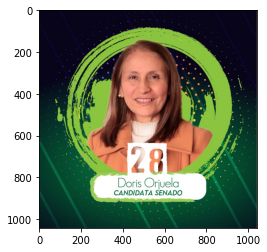

Abogada de la Universidad Nacional de Colombia, trabajó con la Rama Judicial y el Acueducto de Bogotá como asesora jurídica. Actualmente es abogada militante. Literaria y novelista con publicaciones de sus escritos. Trabaja con la cultura y la comunidad en asuntos sociales.
Red social 1 :  https://www.facebook.com/PartidoAlianzaVerde


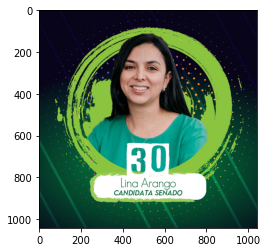

Profesional en Gobierno y Relaciones internacionales con maestría en Desarrollo Regional y dos años de experiencia en en entidades de cooperación internacional y del Estado. Enfoque de trabajo en gobernanza, construcción de paz, transparencia y equidad de género.
Red social 1 :  https://www.facebook.com/Linaarangorisaralda 
Red social 2 :  https://twitter.com/linamariaarango
Red social 3 :  https://www.instagram.com/linaarangosenadora/ 


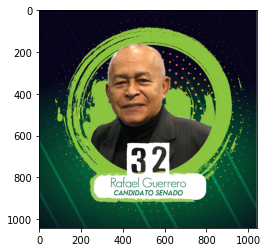

Activista estudiantil vinculado a las luchas agrarias de los campesinos por la tierra para quien la trabaja de la ANUC línea Sincelejo. Fundador de la Asociación de adjudicatarios de vivienda del ICT y UPAC, fue su Presidente, Miembro destacado del Consejo Nacional de los pueblos cívicos comunales y la Coordinadora de Vivienda Popular en los años 1980. Líder sindical de la subdirectiva sindical de Telecom en Montería Córdoba, Miembro vicepresidente de  Consejo de planeación territorial del Atlántico en la primera generación de consejeros con el nacimiento de la ley de participación territorial. 
Red social 1 :  https://www.facebook.com/PartidoAlianzaVerde/


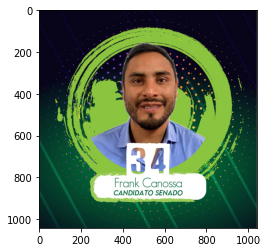

Abogado de la Universidad de los Andes, especialista en Estado, Políticas públicas y Desarrollo. Activista social y medio ambiental. Autor del libro titulado “Agua” fiel creyente de los cambios a través del proceso democrático y participativo, basado en los principios progresistas.
Red social 1 :  https://www.facebook.com/Frankcanossa 
Red social 2 :  / https://twitter.com/canossafrank 
Red social 3 :  https://www.instagram.com/canossafrank/ 


In [ ]:
salida = []
for salida in card:
    photo = salida.find('img', class_ = 'sppb-img-responsive')
    f = urlopen(SITE_URL + photo["src"])
    a = plt.imread(f, '*')
    plt.imshow(a)
    plt.show()
    description = salida.find('span', class_ = 'sppb-person-designation').get_text()
    print(description)
    if len(salida) > 0:
        redes = salida.find('ul', class_= 'sppb-person-social').find_all('a')
        social= []
        i=0
        for social in redes:
            i=i+1
            varias = social.get('href')
            print("Red social", i , ": " , varias)    
    else:
        print("No cuenta con redes sociales")